In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [149]:
df = pd.read_csv('car_resale_prices.csv')

In [150]:
df.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [151]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [152]:
df.shape

(17446, 14)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          17446 non-null  object 
 1   resale_price       17446 non-null  object 
 2   registered_year    17377 non-null  object 
 3   engine_capacity    17432 non-null  object 
 4   insurance          17439 non-null  object 
 5   transmission_type  17446 non-null  object 
 6   kms_driven         17443 non-null  object 
 7   owner_type         17401 non-null  object 
 8   fuel_type          17446 non-null  object 
 9   max_power          17344 non-null  object 
 10  seats              17436 non-null  float64
 11  mileage            16938 non-null  object 
 12  body_type          17446 non-null  object 
 13  city               17446 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.9+ MB


### Iniciando o tratamento de valores nulos

In [154]:
df.isnull().sum()

full_name              0
resale_price           0
registered_year       69
engine_capacity       14
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            102
seats                 10
mileage              508
body_type              0
city                   0
dtype: int64

In [155]:
df['full_name'][0].split()[0]

'2017'

In [156]:
# Confirmando que sempre a primeira parte do split é um ano
df['full_name'].apply(lambda x: x.split()[0]).unique()

array(['2017', '2018', '2015', '2009', '2010', '2016', '2014', '2020',
       '2021', '2019', '2011', '2012', '2013', '2022', '2004', '2008',
       '2006', '2023', '2003', '2007', '1986', '2000', '2002', '2005',
       '2001', '1999', '1998', '1985', '1997', '1995', '1989'],
      dtype=object)

In [157]:
df['registered_year'] = df['registered_year'].fillna(df['full_name'].apply(lambda x: x.split()[0]))

In [158]:
df.iloc[215]['registered_year']

'2022'

In [159]:
df['insurance'].value_counts()

insurance
Third Party insurance    7559
Comprehensive            6414
Third Party              1973
Zero Dep                  834
Not Available             651
1                           5
2                           3
Name: count, dtype: int64

In [160]:
# tratando Not Avaliable, 1 e 2 em insurance
df.loc[df['insurance'] == 'Not Available', 'insurance'] = np.nan
df.loc[df['insurance'] == '1', 'insurance'] = np.nan
df.loc[df['insurance'] == '2', 'insurance'] = np.nan

In [161]:
df.isnull().sum()

full_name              0
resale_price           0
registered_year        0
engine_capacity       14
insurance            666
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            102
seats                 10
mileage              508
body_type              0
city                   0
dtype: int64

In [162]:
df.dropna(inplace=True)

In [163]:
df.isnull().sum()

full_name            0
resale_price         0
registered_year      0
engine_capacity      0
insurance            0
transmission_type    0
kms_driven           0
owner_type           0
fuel_type            0
max_power            0
seats                0
mileage              0
body_type            0
city                 0
dtype: int64

#### Convertendo para float e normalizando a coluna de mileage para kmpl (quilômetros por litro) 

In [164]:
df['mileage'].unique()

array(['21.4 kmpl', '17.6 kmpl', '20.85 kmpl', '19.81 kmpl', '17.19 kmpl',
       '27.28 kmpl', '15.37 kmpl', '18 kmpl', '20.14 kmpl', '21.56 kmpl',
       '23.7 kmpl', '23.95 kmpl', '26.6 kmpl', '21.43 kmpl', '18.2 kmpl',
       '20.65 kmpl', '22.7 kmpl', '11.3 kmpl', '26.59 kmpl', '20.92 kmpl',
       '21.01 kmpl', '22.74 kmpl', '20.51 kmpl', '18.9 kmpl', '22.9 kmpl',
       '15.1 kmpl', '11.57 kmpl', '23.84 kmpl', '24.3 kmpl', '25.47 kmpl',
       '25.24 kmpl', '22.1 kmpl', '22.05 kmpl', '11.4 kmpl', '12.8 kmpl',
       '18.8 kmpl', '24 kmpl', '21.94 km/kg', '16.55 kmpl', '21 kmpl',
       '22.07 kmpl', '17.92 kmpl', '20.36 kmpl', '17.52 kmpl',
       '18.97 kmpl', '20 kmpl', '16.56 kmpl', '21.1 kmpl', '20.09 kmpl',
       '23.59 kmpl', '19.87 kmpl', '16 kmpl', '20.8 kmpl', '28.4 kmpl',
       '21.79 kmpl', '20.45 kmpl', '24.4 kmpl', '27.3 kmpl', '22.41 kmpl',
       '25.6 kmpl', '26.2 kmpl', '25.17 kmpl', '15.5 kmpl', '21.21 kmpl',
       '15.4 kmpl', '25.8 kmpl', '23.4 kmpl', '26 

In [165]:
def converter_coluna_mileage(x):
    if 'kmpl' in x:
        return float(x.replace('kmpl', '').strip())
    elif 'km/kg' in x:
        km_kg = float(x.replace('km/kg', '').strip())
        return km_kg / 1.39 # pesquisei a conversão de gás natural para quilômetros por litro
    
df['mileage'] = df['mileage'].apply(converter_coluna_mileage)
df.rename(columns={'mileage': 'mileage_kmpl'}, inplace=True)

In [166]:
df['kms_driven'].unique()

array(['40,000 Kms', '70,000 Kms', '80,000 Kms', ..., '9,400 Kms',
       '800 Kms', '67,634 Kms'], shape=(7527,), dtype=object)

In [167]:
def converter_coluna_kms_driven(x):
    return float(x.replace(',', '').replace('Kms', '').strip())
    
df['kms_driven'] = df['kms_driven'].apply(converter_coluna_kms_driven)

#### Convertendo a coluna engine_capacity para inteiro e retirando os carros elétricos que possuem valores de 0 cc e 72 cc

In [168]:
df['engine_capacity'].unique()

array(['1197 cc', '2179 cc', '1086 cc', '1047 cc', '1196 cc', '1198 cc',
       '1462 cc', '1493 cc', '1396 cc', '998 cc', '1496 cc', '1364 cc',
       '1498 cc', '2360 cc', '1248 cc', '796 cc', '1199 cc', '2494 cc',
       '1186 cc', '1968 cc', '999 cc', '1399 cc', '1956 cc', '814 cc',
       '1461 cc', '1061 cc', '995 cc', '1499 cc', '799 cc', '1120 cc',
       '1586 cc', '936 cc', '1353 cc', '1451 cc', '1497 cc', '1582 cc',
       '1368 cc', '2354 cc', '2184 cc', '1995 cc', '2499 cc', '1395 cc',
       '1998 cc', '1798 cc', '2143 cc', '2967 cc', '1796 cc', '2894 cc',
       '1984 cc', '1298 cc', '1799 cc', '1591 cc', '624 cc', '1598 cc',
       '1172 cc', '2755 cc', '1373 cc', '1405 cc', '2982 cc', '1997 cc',
       '2498 cc', '2198 cc', '3198 cc', '909 cc', '1193 cc', '2609 cc',
       '3498 cc', '2993 cc', '1991 cc', '1950 cc', '3604 cc', '2995 cc',
       '2998 cc', '1999 cc', '2987 cc', '1996 cc', '1896 cc', '4663 cc',
       '2523 cc', '2393 cc', '4951 cc', '2199 cc', '1495 cc'

In [169]:
def converter_coluna_engine_capacity(x):
    if pd.isna(x):
        return x
    else:
        return int(x.replace('cc', '').strip())
    
df['engine_capacity'] = df['engine_capacity'].apply(converter_coluna_engine_capacity)
df.rename(columns={'engine_capacity': 'engine_capacity_cc'}, inplace=True)

In [170]:
df['engine_capacity_cc'].describe()

count    16172.000000
mean      1420.509832
std        469.033532
min          0.000000
25%       1197.000000
50%       1199.000000
75%       1498.000000
max       5998.000000
Name: engine_capacity_cc, dtype: float64

In [171]:
df[df['engine_capacity_cc'] == 0]

,full_name,resale_price,registered_year,engine_capacity_cc,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage_kmpl,body_type,city
8857,2015 Mahindra e2o T2,₹ 3.35 Lakh,Oct 2015,0,Third Party insurance,Automatic,43064.0,First Owner,Electric,25.5bhp,5.0,120.0,Hatchback,Hyderabad


In [172]:
df[df['fuel_type'] == 'Electric']

,full_name,resale_price,registered_year,engine_capacity_cc,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage_kmpl,body_type,city
8857,2015 Mahindra e2o T2,₹ 3.35 Lakh,Oct 2015,0,Third Party insurance,Automatic,43064.0,First Owner,Electric,25.5bhp,5.0,120.0,Hatchback,Hyderabad
10558,2017 Mahindra e2o Plus P8,₹ 4.60 Lakh,2017,72,Third Party insurance,Automatic,20000.0,Second Owner,Electric,40bhp,4.0,140.0,Hatchback,Bangalore
14181,2017 Mahindra e2o Plus P8,₹ 5.50 Lakh,2017,72,Third Party insurance,Automatic,10000.0,First Owner,Electric,40bhp,4.0,140.0,Hatchback,Delhi
14193,2017 Mahindra e2o Plus P8,₹ 5.50 Lakh,2017,72,Third Party insurance,Automatic,10000.0,First Owner,Electric,40bhp,4.0,140.0,Hatchback,Delhi


In [173]:
df.loc[(df['fuel_type'] == 'Electric') & (df['engine_capacity_cc'].isin([0, 72])), 'engine_capacity_cc'] = np.nan

In [174]:
df[df['fuel_type'] == 'Electric']

,full_name,resale_price,registered_year,engine_capacity_cc,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage_kmpl,body_type,city
8857,2015 Mahindra e2o T2,₹ 3.35 Lakh,Oct 2015,NaN,Third Party insurance,Automatic,43064.0,First Owner,Electric,25.5bhp,5.0,120.0,Hatchback,Hyderabad
10558,2017 Mahindra e2o Plus P8,₹ 4.60 Lakh,2017,NaN,Third Party insurance,Automatic,20000.0,Second Owner,Electric,40bhp,4.0,140.0,Hatchback,Bangalore
14181,2017 Mahindra e2o Plus P8,₹ 5.50 Lakh,2017,NaN,Third Party insurance,Automatic,10000.0,First Owner,Electric,40bhp,4.0,140.0,Hatchback,Delhi
14193,2017 Mahindra e2o Plus P8,₹ 5.50 Lakh,2017,NaN,Third Party insurance,Automatic,10000.0,First Owner,Electric,40bhp,4.0,140.0,Hatchback,Delhi


In [175]:
df.dropna(inplace=True)

#### Analisando e posteriormente convertendo a coluna de registered_year para inteiro de forma que permaneça somente o ano 

In [176]:
df['registered_year'].unique()

array(['2017', '2018', '2015', '2009', '2010', '2016', '2014', '2020',
       '2021', '2019', '2011', '2012', '2013', '2022', '2004', 'Dec 2018',
       'Jun 2018', 'Mar 2016', 'Feb 2018', 'Oct 2014', 'Mar 2014',
       'Feb 2013', 'Aug 2018', 'Jun 2019', 'Dec 2021', 'Apr 2019',
       'May 2018', 'Nov 2013', 'Sept 2022', 'Jan 2021', 'Sept 2020',
       'Jan 2015', 'Oct 2017', 'Sept 2019', 'Jul 2019', 'Mar 2020',
       'Jan 2018', 'Nov 2015', 'May 2015', 'Dec 2014', 'Feb 2019',
       'May 2016', 'Apr 2018', 'May 2021', '2008', 'Mar 2022', 'Jun 2016',
       'Jun 2017', 'Jul 2016', 'Jun 2015', 'Sept 2018', 'Nov 2018',
       'Aug 2019', 'Jun 2021', '2006', 'Jan 2017', 'Aug 2014', 'Jul 2013',
       'Jul 2017', 'Dec 2013', 'Sept 2016', 'Mar 2017', 'Feb 2020',
       'Oct 2018', 'May 2014', 'Aug 2021', 'Aug 2020', 'Mar 2019',
       'Jan 2016', 'Feb 2016', 'Oct 2015', 'May 2019', 'Dec 2012',
       'Nov 2021', 'Mar 2018', 'Nov 2019', 'Aug 2017', 'Feb 2014',
       'Feb 2021', 'Mar 2021'

In [177]:
def converter_coluna_registered_year(x):
    if 'Jan' in x:
        return int(x.replace('Jan', '').strip())
    elif 'Feb' in x:
        return int(x.replace('Feb', '').strip())
    elif 'Mar' in x:
        return int(x.replace('Mar', '').strip())
    elif 'Apr' in x:
        return int(x.replace('Apr', '').strip())
    elif 'May' in x: 
        return int(x.replace('May', '').strip())
    elif 'Jun' in x: 
        return int(x.replace('Jun', '').strip())
    elif 'Jul' in x:
        return int(x.replace('Jul', '').strip()) 
    elif 'Aug' in x: 
        return int(x.replace('Aug', '').strip())
    elif 'Sept' in x: 
        return int(x.replace('Sept', '').strip())
    elif 'Oct' in x: 
        return int(x.replace('Oct', '').strip())
    elif 'Nov' in x: 
        return int(x.replace('Nov', '').strip())
    elif 'Dec' in x:
        return int(x.replace('Dec', '').strip())
    else:
        return int(x)

df['registered_year'] = df['registered_year'].apply(converter_coluna_registered_year)

In [178]:
df['registered_year'].unique()

array([2017, 2018, 2015, 2009, 2010, 2016, 2014, 2020, 2021, 2019, 2011,
       2012, 2013, 2022, 2004, 2008, 2006, 2023, 2003, 1986, 2000, 2007,
       2005, 1998, 2002, 1985, 2001, 1997, 1999])

#### Convertendo a coluna de resale_price para float e normalizando a coluna para Rupias Indianas (inr)

In [179]:
df['resale_price'].unique()
# Crore = 10.000.000
# Lakh = 100.000

array(['₹ 5.45 Lakh', '₹ 10 Lakh', '₹ 4.50 Lakh', ..., '₹ 11.29 Lakh',
       '₹ 1.57 Crore', '₹ 27.25 Lakh'], shape=(1633,), dtype=object)

In [180]:
df['resale_price'].loc[df['resale_price'] == '₹ 2.25 Crore']

1476    ₹ 2.25 Crore
Name: resale_price, dtype: object

In [181]:
def converter_preco(x):
    if '₹' in x and 'Lakh' in x:
        return float(x.replace('₹', '').replace('Lakh', '').replace(',', '.').strip()) * 100000
    elif '₹' in x and 'Crore' in x:
        return float(x.replace('₹', '').replace('Crore', '').replace(',', '.').strip()) * 10000000
    else:
        return float(x.replace('₹', '').replace(',', '').strip())
    
df['resale_price'] = df['resale_price'].apply(converter_preco)
df.rename(columns={'resale_price': 'resale_price_inr'}, inplace=True) # inr para dizer que está em rupias indianas

In [182]:
df['resale_price_inr'].unique()

array([  545000.,  1000000.,   450000., ...,  1129000., 15700000.,
        2725000.], shape=(1633,))

In [183]:
df.loc[df['resale_price_inr'] == 22500000.0]

,full_name,resale_price_inr,registered_year,engine_capacity_cc,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage_kmpl,body_type,city
1476,2021 Mercedes-Benz G G 350d,22500000.0,2021,2925.0,Comprehensive,Automatic,36000.0,First Owner,Diesel,281.61bhp,5.0,8.13,SUV,Delhi


#### Convertendo para float e normalizando toda a coluna de max_power para bhp (brake horse power)

In [184]:
df['max_power'].unique()
# bhp (brake horse power) é uma medida quase equivalente a horse power, no entanto ela é feita diretamente no eixo (evitando perdas de transmissão, atrito, entre outros)

array(['83.1bhp', '153.86bhp', '83.14bhp', '68.05bhp', '81.86bhp',
       '69bhp', '73bhp', '86.7bhp', '103.25bhp', '98.6bhp', '89bhp',
       '67.1bhp', '58.16bhp', '88.7bhp', '87.2bhp', '118.36bhp',
       '89.84bhp', '170PS', '74bhp', '81.80bhp', '47.3bhp', '67.04bhp',
       '82bhp', '140bhp', '138.1bhp', '84bhp', '88.5bhp', '88.50bhp',
       '65.71bhp', '47.33bhp', '100.6bhp', '102', '90 PS', '73.97bhp',
       '61.7bhp', '147.51bhp', '73.9bhp', '62.1bhp', '78.9bhp',
       '108.62bhp', '167.67bhp', '55.2bhp', '86.63bhp', '88bhp',
       '67.06bhp', '83.8bhp', '113.43bhp', '74.02bhp', '67.05bhp',
       '67bhp', '63PS at 5,400 rpm', '98.96bhp', '97.9bhp', '58.2bhp',
       '53.3bhp', '62bhp', '70bhp', '103.3bhp', '120bhp (86.7kw)',
       '118.35bhp', '75 PS at 4000 rpm', '152.87bhp', '57.6bhp', '99bhp',
       '138bhp', '141bhp', '108.5bhp', '86.8bhp', '78 kW', '105.94bhp',
       '118PS at 6,600 rpm', '72bhp', '61.68bhp', '108.45bhp', '88.73bhp',
       '74.96bhp', '126.2bhp', 

In [185]:
def converter_coluna_max_power(x):
    x = str(x).lower()
    if 'bhp' in x:
        return float(x.split('bhp')[0].replace('bhp', '').strip())
    elif 'hp' in x:
        return float(x.split('hp')[0].replace('hp', '').strip())
    elif 'ps' in x:
        return float(x.split()[0].replace('ps', '').strip()) * 0.98632
    elif 'kw' in x:
        return float(x.split()[0].replace('kw', '').strip()) * 1.34102209
    elif '(' in x:
        return float(x.split('(')[0].strip())
    elif '/' in x:
        return float(x.split('/')[0].strip())
    else:
        return float(x.strip())

df['max_power'] = df['max_power'].apply(converter_coluna_max_power)
df.rename(columns={'max_power': 'max_power_bhp'}, inplace=True)

In [186]:
df['max_power_bhp'].describe()

count    16168.000000
mean       102.961626
std         43.941076
min         32.500000
25%         78.900000
50%         88.500000
75%        117.600000
max        558.000000
Name: max_power_bhp, dtype: float64

### Fim do tratamento e normalização da tabela

In [187]:
df.head()

,full_name,resale_price_inr,registered_year,engine_capacity_cc,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power_bhp,seats,mileage_kmpl,body_type,city
0,2017 Maruti Baleno 1.2 Alpha,545000.0,2017,1197.0,Third Party insurance,Manual,40000.0,First Owner,Petrol,83.10,5.0,21.40,Hatchback,Agra
1,2018 Tata Hexa XTA,1000000.0,2018,2179.0,Third Party insurance,Automatic,70000.0,First Owner,Diesel,153.86,7.0,17.60,MUV,Agra
2,2015 Maruti Swift Dzire VXI,450000.0,2015,1197.0,Third Party insurance,Manual,70000.0,Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra
3,2015 Maruti Swift Dzire VXI,450000.0,2015,1197.0,Third Party insurance,Manual,70000.0,Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,160000.0,2009,1086.0,Third Party insurance,Manual,80000.0,First Owner,Petrol,68.05,5.0,19.81,Hatchback,Agra


### Gerando gráficos

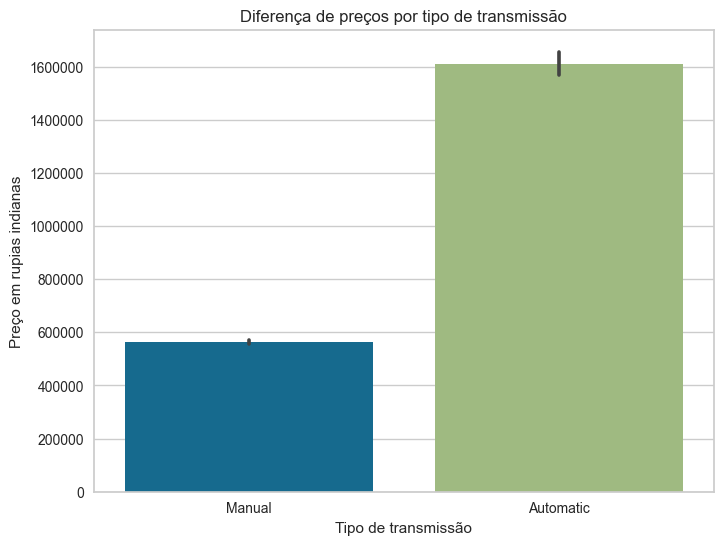

In [188]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=df, x='transmission_type', y='resale_price_inr', hue='transmission_type')
plt.title('Diferença de preços por tipo de transmissão')
plt.ylabel('Preço em rupias indianas')
plt.xlabel('Tipo de transmissão')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

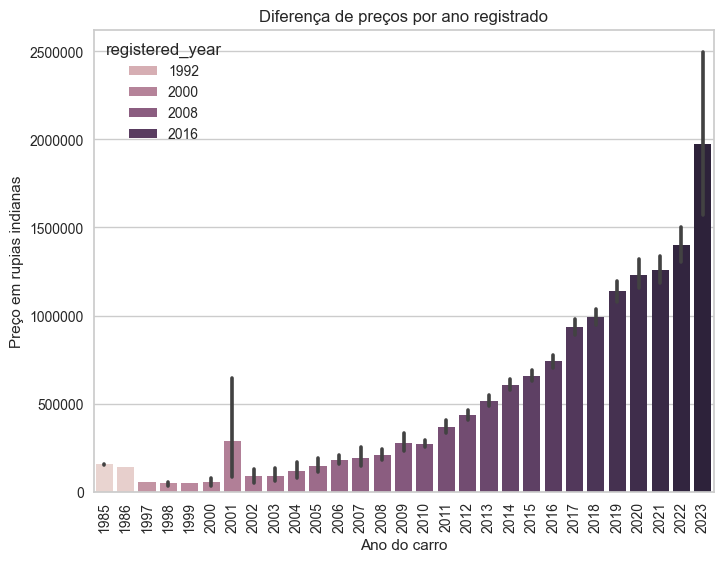

In [189]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=df, x='registered_year', y='resale_price_inr', hue='registered_year')
plt.title('Diferença de preços por ano registrado')
plt.ylabel('Preço em rupias indianas')
plt.xlabel('Ano do carro')
plt.xticks(rotation=90)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

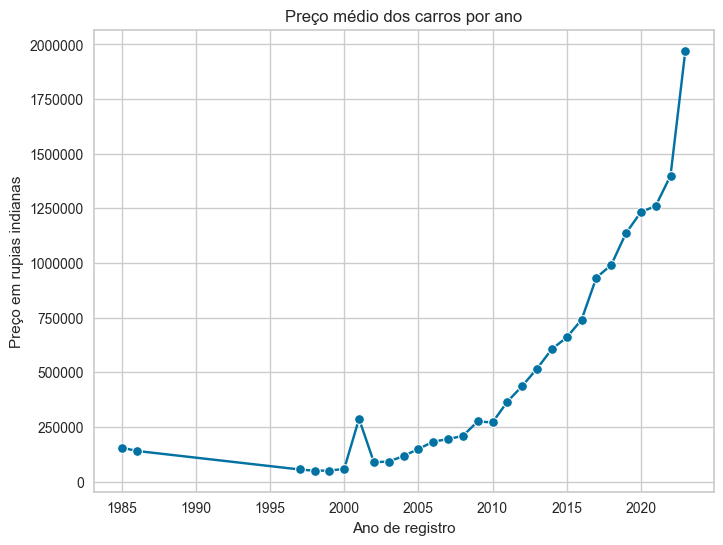

In [190]:
preco_medio_por_ano = df.groupby("registered_year")["resale_price_inr"].mean().reset_index()

fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(data=preco_medio_por_ano, x='registered_year', y='resale_price_inr', marker="o")
plt.title('Preço médio dos carros por ano')
plt.xlabel('Ano de registro')
plt.ylabel('Preço em rupias indianas')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

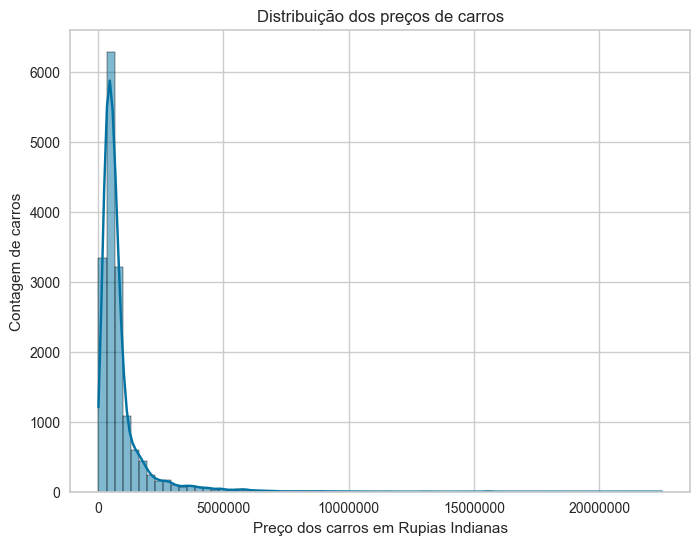

In [191]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df['resale_price_inr'], kde=True, bins=70)
plt.title('Distribuição dos preços de carros')
plt.ylabel('Contagem de carros')
plt.xlabel('Preço dos carros em Rupias Indianas')
ax.ticklabel_format(style='plain', axis='x')
plt.show()

### Verificando a presença de outliers

In [192]:
df_numerico = df.select_dtypes('number')
df_numerico

,resale_price_inr,registered_year,engine_capacity_cc,kms_driven,max_power_bhp,seats,mileage_kmpl
0,545000.0,2017,1197.0,40000.0,83.10,5.0,21.40
1,1000000.0,2018,2179.0,70000.0,153.86,7.0,17.60
2,450000.0,2015,1197.0,70000.0,83.14,5.0,20.85
3,450000.0,2015,1197.0,70000.0,83.14,5.0,20.85
4,160000.0,2009,1086.0,80000.0,68.05,5.0,19.81
...,...,...,...,...,...,...,...
17441,325000.0,2013,1198.0,89000.0,86.70,5.0,18.00
17442,2075000.0,2016,2494.0,68000.0,157.70,5.0,19.16
17443,835000.0,2016,1798.0,81000.0,138.03,5.0,14.28
17444,1395000.0,2019,1582.0,20000.0,126.20,5.0,17.01


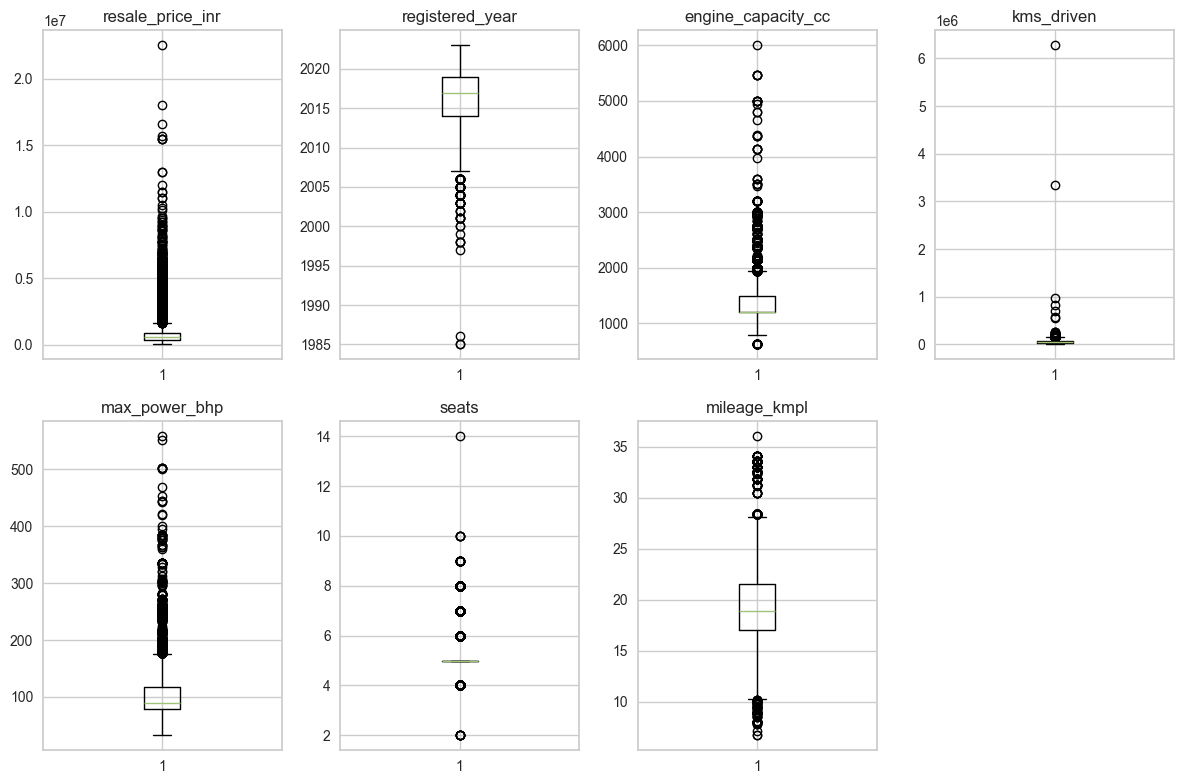

In [193]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(df_numerico.columns):
    axes[i].boxplot(df_numerico[col])
    axes[i].set_title(col)

axes[7].remove()

plt.tight_layout()
plt.show()

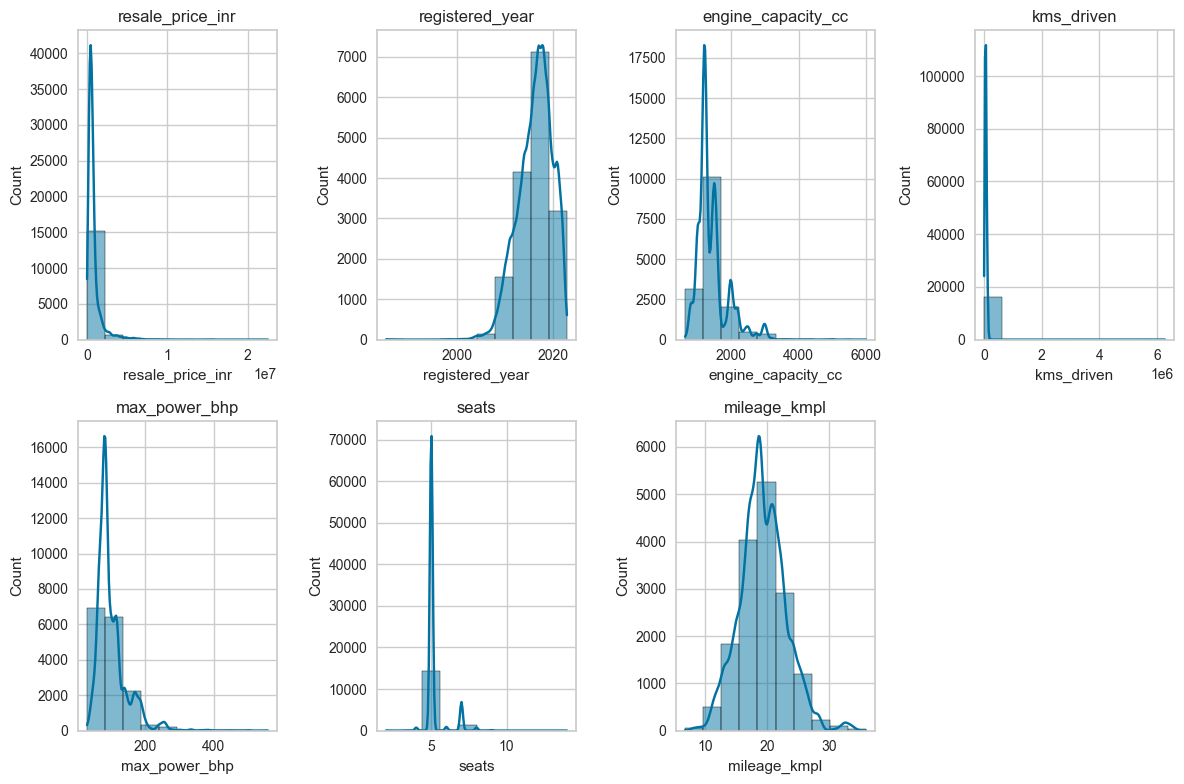

In [194]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(df_numerico.columns):
    sns.histplot(df_numerico[col], bins=10, ax=axes[i], kde=True)
    axes[i].set_title(col)

axes[7].remove()

plt.tight_layout()
plt.show()

### Removendo os outliers

In [195]:
Q1_resale_price = df['resale_price_inr'].quantile(0.25)
Q3_resale_price = df['resale_price_inr'].quantile(0.75)
IQR_resale_price = Q3_resale_price - Q1_resale_price

Q1_kms_driven = df['kms_driven'].quantile(0.25)
Q3_kms_driven = df['kms_driven'].quantile(0.75)
IQR_kms_driven = Q3_kms_driven - Q1_kms_driven

Q1_max_power_bhp = df['max_power_bhp'].quantile(0.25)
Q3_max_power_bhp = df['max_power_bhp'].quantile(0.75)
IQR_max_power_bhp = Q3_max_power_bhp - Q1_max_power_bhp

df_sem_outliers = df[(df['resale_price_inr'] >= Q1_resale_price - 1.5*IQR_resale_price) & (df['resale_price_inr'] <= Q3_resale_price + 1.5*IQR_resale_price) &
                     (df['kms_driven'] >= Q1_kms_driven - 1.5*IQR_kms_driven) & (df['kms_driven'] <= Q3_kms_driven + 1.5*IQR_kms_driven) &
                     (df['max_power_bhp'] >= Q1_max_power_bhp - 1.5*IQR_max_power_bhp) & (df['max_power_bhp'] <= Q3_max_power_bhp + 1.5*IQR_max_power_bhp)]

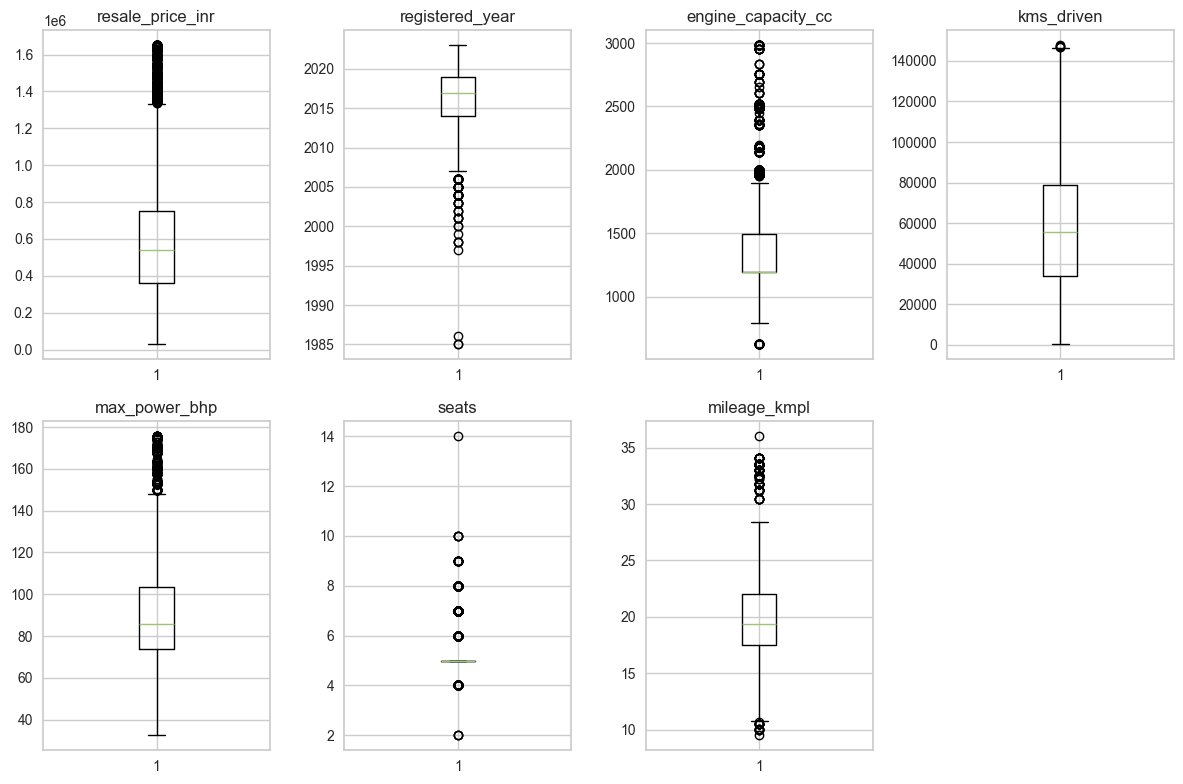

In [196]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))

axes = axes.flatten()

df_sem_outliers_num = df_sem_outliers.select_dtypes('number')

for i, col in enumerate(df_sem_outliers_num.columns):
    axes[i].boxplot(df_sem_outliers_num[col])
    axes[i].set_title(col)

axes[7].remove()

plt.tight_layout()
plt.show()

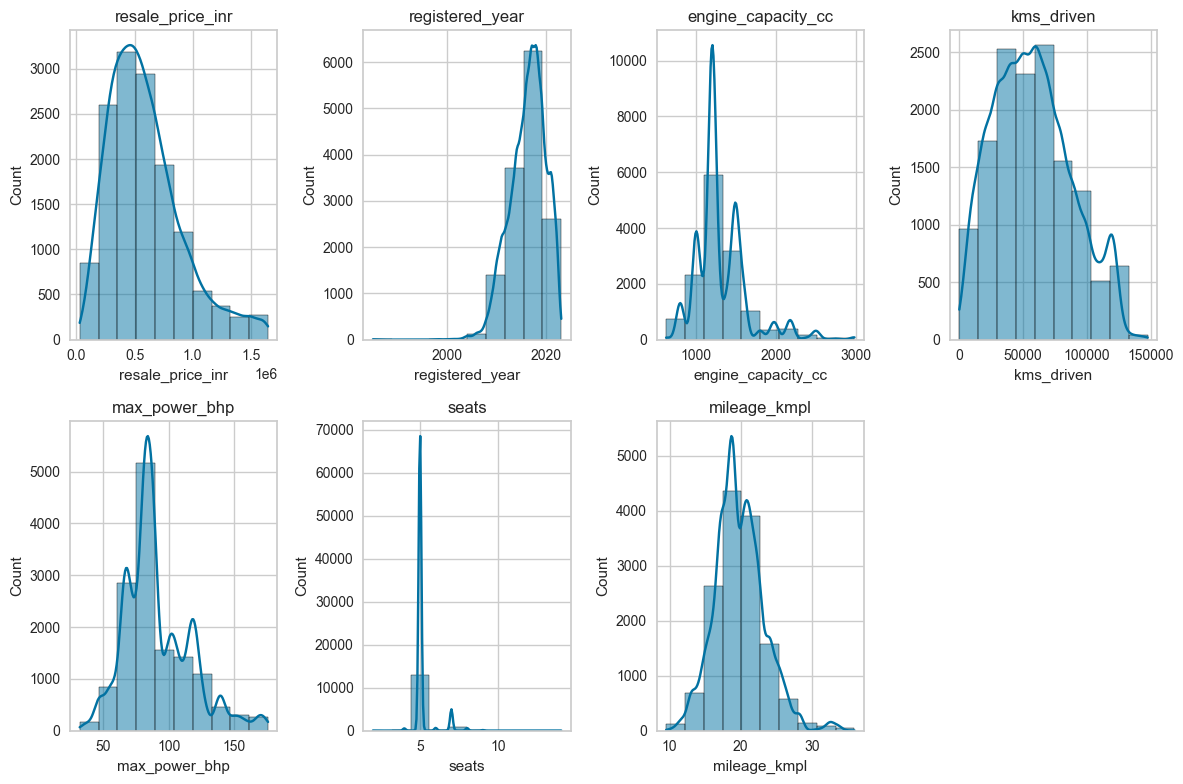

In [197]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))

axes = axes.flatten()


for i, col in enumerate(df_sem_outliers_num.columns):
    sns.histplot(df_sem_outliers_num[col], bins=10, ax=axes[i], kde=True)
    axes[i].set_title(col)

axes[7].remove()

plt.tight_layout()
plt.show()

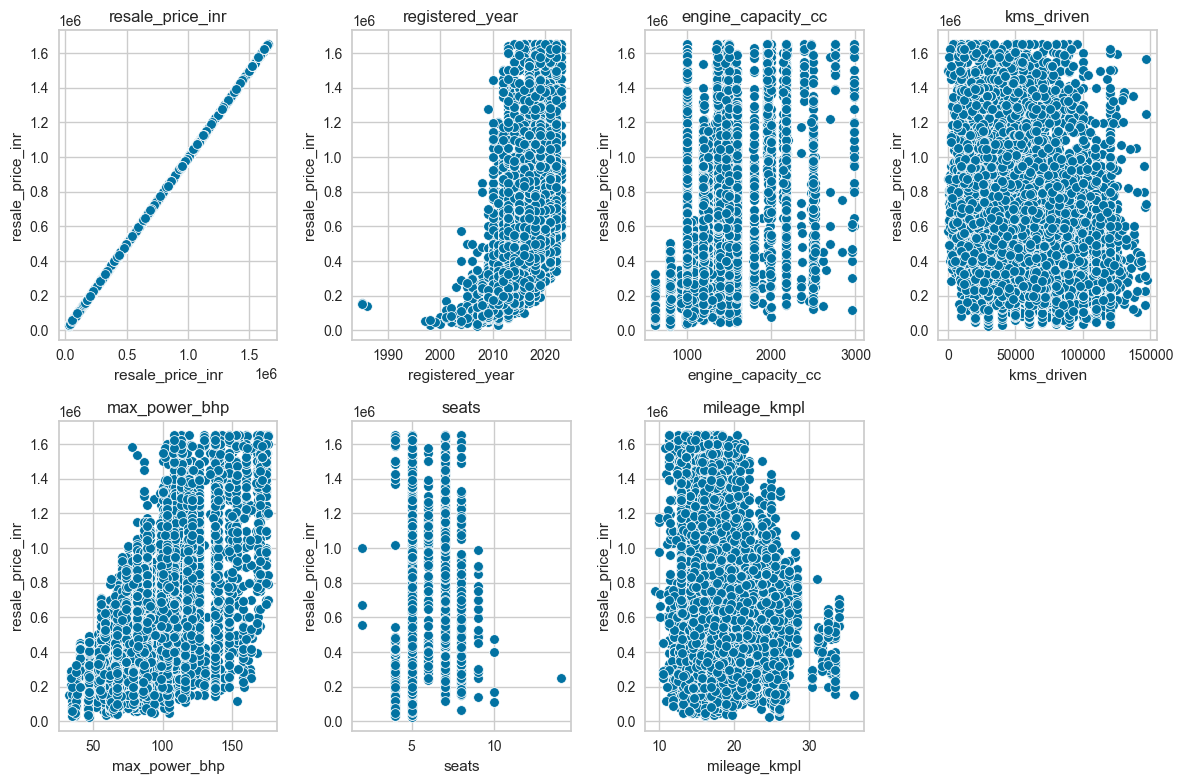

In [199]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(df_sem_outliers_num.columns):
    sns.scatterplot(x = df_sem_outliers_num[col], y = df_sem_outliers_num['resale_price_inr'], ax=axes[i])
    axes[i].set_title(col)

axes[7].remove()

plt.tight_layout()
plt.show()

### Aplicando a Regressão linear

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from yellowbrick.regressor import PredictionError

In [127]:
y = df_sem_outliers['resale_price_inr']
colunas_categoricas = ['transmission_type', 'fuel_type', 'owner_type', 'insurance', 'city']
colunas_numericas = ['registered_year', 'engine_capacity_cc', 'kms_driven', 'max_power_bhp', 'seats', 'mileage_kmpl']
X = df_sem_outliers[colunas_numericas + colunas_categoricas]

In [128]:
dummies = pd.get_dummies(df_sem_outliers[colunas_categoricas], drop_first=True)
dummies

,transmission_type_Manual,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,owner_type_First Owner,owner_type_Fourth Owner,owner_type_Second Owner,owner_type_Third Owner,insurance_Third Party,insurance_Third Party insurance,...,city_Chandigarh,city_Chennai,city_Delhi,city_Gurgaon,city_Hyderabad,city_Jaipur,city_Kolkata,city_Lucknow,city_Mumbai,city_Pune
0,True,False,False,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17440,False,False,False,True,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
17441,True,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
17443,True,False,False,True,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
17444,False,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [129]:
X = pd.concat([X.drop(colunas_categoricas, axis=1), dummies], axis=1)
X

,registered_year,engine_capacity_cc,kms_driven,max_power_bhp,seats,mileage_kmpl,transmission_type_Manual,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,...,city_Chandigarh,city_Chennai,city_Delhi,city_Gurgaon,city_Hyderabad,city_Jaipur,city_Kolkata,city_Lucknow,city_Mumbai,city_Pune
0,2017,1197.0,40000.0,83.10,5.0,21.40,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2018,2179.0,70000.0,153.86,7.0,17.60,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2015,1197.0,70000.0,83.14,5.0,20.85,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2015,1197.0,70000.0,83.14,5.0,20.85,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2009,1086.0,80000.0,68.05,5.0,19.81,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17440,2016,1999.0,67634.0,149.92,5.0,14.62,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
17441,2013,1198.0,89000.0,86.70,5.0,18.00,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
17443,2016,1798.0,81000.0,138.03,5.0,14.28,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
17444,2019,1582.0,20000.0,126.20,5.0,17.01,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [131]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [132]:
y_pred = model.predict(X_test)

In [133]:
print('--Regressão Linear--')
r2 = r2_score(y_test, y_pred)
print("R²:", r2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

--Regressão Linear--
R²: 0.7850582069407093
RMSE: 151090.3766366858


c:\Users\Yago Schnorr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


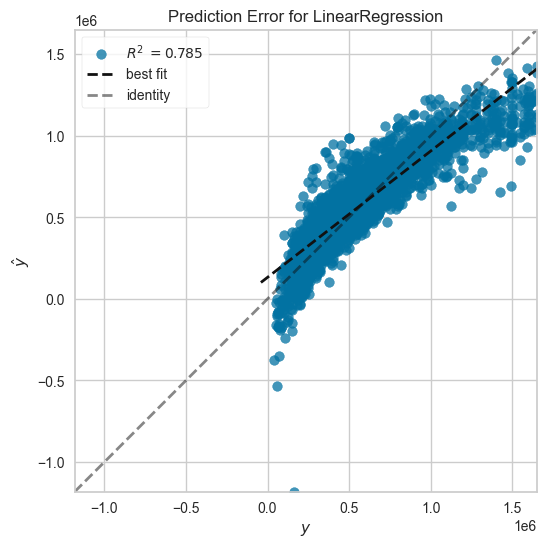

In [134]:
fix, ax = plt.subplots(figsize=(8,6))
pev = PredictionError(model)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()
plt.show()

### Aplicando random forest

In [135]:
rf = RandomForestRegressor(n_estimators=100, random_state=5)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [136]:
y_pred = rf.predict(X_test)

In [137]:
print('--Random Forest--')
print("R²:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

--Random Forest--
R²: 0.9155392161354701
RMSE: 94711.76368035388


c:\Users\Yago Schnorr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


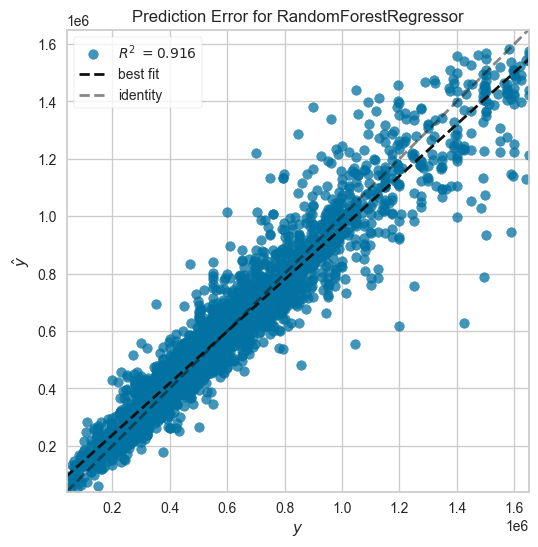

In [138]:
fix, ax = plt.subplots(figsize=(8,6))
pev = PredictionError(rf)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()
plt.show()

##### Deixando somente as variáveis importantes

In [139]:
importancia = pd.DataFrame({'Variavel': X.columns, 'Importancia': rf.feature_importances_}).sort_values(by='Importancia', ascending=False)
importancia

,Variavel,Importancia
3,max_power_bhp,0.460450
0,registered_year,0.366348
1,engine_capacity_cc,0.047035
5,mileage_kmpl,0.032262
2,kms_driven,0.027671
6,transmission_type_Manual,0.011261
18,city_Bangalore,0.010617
4,seats,0.005514
25,city_Kolkata,0.004457
23,city_Hyderabad,0.003642


In [140]:
variaveis_importantes = importancia[importancia['Importancia'] > 0.01]['Variavel'].tolist()
nomes_colunas = importancia[importancia['Importancia'] > 0.01]['Variavel'].tolist()
nomes_colunas

['max_power_bhp',
 'registered_year',
 'engine_capacity_cc',
 'mileage_kmpl',
 'kms_driven',
 'transmission_type_Manual',
 'city_Bangalore']

In [141]:
X_train_filtrado = X_train[variaveis_importantes]
X_test_filtrado = X_test[variaveis_importantes]

In [143]:
rf_filtrado = RandomForestRegressor(random_state=5)
rf_filtrado.fit(X_train_filtrado, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [144]:
y_pred = rf_filtrado.predict(X_test_filtrado)

In [145]:
print("\n--Random Forest com variáveis importantes--")
print("R²:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


--Random Forest com variáveis importantes--
R²: 0.9005751076096559
RMSE: 102759.96197182519


c:\Users\Yago Schnorr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


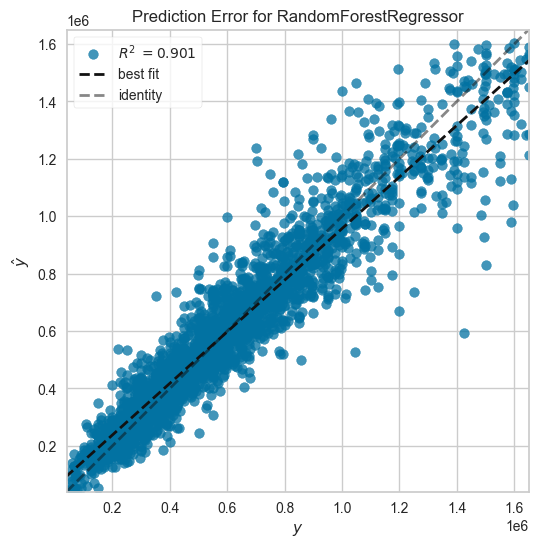

In [147]:
fix, ax = plt.subplots(figsize=(8,6))
pev = PredictionError(rf_filtrado)
pev.fit(X_train_filtrado, y_train)
pev.score(X_test_filtrado, y_test)
pev.poof()
plt.show()

### Testando o modelo

In [72]:
teste = pd.DataFrame({'max_power_bhp': [250],
                        'registered_year': [2015],
                        'engine_capacity_cc': [1500],
                        'mileage_kmpl': [22],
                        'kms_driven': [100000],
                        'transmission_type_Manual': [0],
                        'city_Bangalore': [1]})

In [73]:
teste_pred = rf_filtrado.predict(teste)
print(teste_pred)

[1169190.]
